In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/spotify_dataset.csv")

# Exploración de datos

In [4]:
print("Dataset Info:")
df.info(verbose=True)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551443 entries, 0 to 551442
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Artist(s)                       551443 non-null  object 
 1   song                            551427 non-null  object 
 2   text                            551443 non-null  object 
 3   Length                          551443 non-null  object 
 4   emotion                         551443 non-null  object 
 5   Genre                           551443 non-null  object 
 6   Album                           551391 non-null  object 
 7   Release Date                    551443 non-null  object 
 8   Key                             551443 non-null  object 
 9   Tempo                           551443 non-null  int64  
 10  Loudness (db)                   551443 non-null  object 
 11  Time signature                  551435 non-null  object 
 12  Ex

In [5]:
# Primeras filas
pd.set_option('display.max_columns', None)
df.head()

,Artist(s),song,text,Length,emotion,Genre,Album,Release Date,Key,Tempo,Loudness (db),Time signature,Explicit,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similar Artist 1,Similar Song 1,Similarity Score 1,Similar Artist 2,Similar Song 2,Similarity Score 2,Similar Artist 3,Similar Song 3,Similarity Score 3
0,!!!,Even When the Waters Cold,Friends told her she was better off at the bot...,03:47,sadness,hip hop,Thr!!!er,29th April 2013,D min,105,-6.85db,4/4,No,40,83,71,87,4,16,11,0,0,0,0,0,0,0,0,0,0,Corey Smith,If I Could Do It Again,0.986061,Toby Keith,Drinks After Work,0.983719,Space,Neighbourhood,0.983236
1,!!!,One Girl / One Boy,"Well I heard it, playing soft From a drunken b...",04:03,sadness,hip hop,Thr!!!er,29th April 2013,A# min,117,-5.75db,4/4,No,42,85,70,87,4,32,0,0,0,0,0,0,0,0,0,0,0,Hiroyuki Sawano,BRE@TH//LESS,0.995409,When In Rome,Heaven Knows,0.990905,Justice Crew,Everybody,0.984483
2,!!!,Pardon My Freedom,"Oh my god, did I just say that out loud? Shoul...",05:51,joy,hip hop,Louden Up Now,8th June 2004,A Maj,121,-6.06db,4/4,No,29,89,71,63,8,64,0,20,0,0,0,1,0,0,0,0,0,Ricky Dillard,More Abundantly Medley Live,0.993176,Juliet,Avalon,0.965147,The Jacksons,Lovely One,0.956752
3,!!!,Ooo,[Verse 1] Remember when I called you on the te...,03:44,joy,hip hop,As If,16th October 2015,A min,122,-5.42db,4/4,No,24,84,78,97,4,12,12,0,0,0,0,1,0,0,0,0,0,Eric Clapton,Man Overboard,0.992749,Roxette,Don't Believe In Accidents,0.991494,Tiwa Savage,My Darlin,0.990381
4,!!!,Freedom 15,[Verse 1] Calling me like I got something to s...,06:00,joy,hip hop,As If,16th October 2015,F min,123,-5.57db,4/4,No,30,71,77,70,7,10,4,1,0,0,0,1,0,0,0,0,0,Cibo Matto,Lint Of Love,0.981610,Barrington Levy,Better Than Gold,0.981524,Freestyle,Its Automatic,0.981415


In [6]:
# Nulos
print("\nCantidad de valores nulos por columna (solo las que tienen nulos):")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])


Cantidad de valores nulos por columna (solo las que tienen nulos):
song              16
Album             52
Time signature     8
Similar Song 1    19
Similar Song 2    20
Similar Song 3     4
dtype: int64


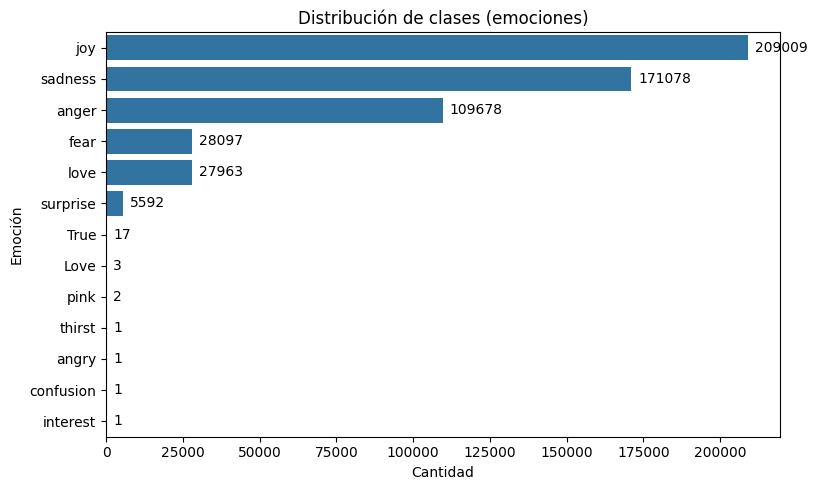

In [7]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y='emotion', data=df, order=df['emotion'].value_counts().index)
plt.title("Distribución de clases (emociones)")
plt.xlabel("Cantidad")
plt.ylabel("Emoción")
plt.tight_layout()
# Agregar los conteos a cada barra
for p in ax.patches:
    count = int(p.get_width())
    ax.annotate(str(count), (p.get_width(), p.get_y() + p.get_height()/2),
                va='center', ha='left', fontsize=10, color='black', xytext=(5,0), textcoords='offset points')
plt.show()

In [8]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas de variables numéricas:")
df.describe()


Estadísticas descriptivas de variables numéricas:


,Tempo,Popularity,Energy,Danceability,Positiveness,Speechiness,Liveness,Acousticness,Instrumentalness,Good for Party,Good for Work/Study,Good for Relaxation/Meditation,Good for Exercise,Good for Running,Good for Yoga/Stretching,Good for Driving,Good for Social Gatherings,Good for Morning Routine,Similarity Score 1,Similarity Score 2,Similarity Score 3
count,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000,551443.000000
mean,120.513567,32.258106,62.661874,59.195460,47.738330,11.663980,19.655658,25.748436,7.152255,0.061809,0.074931,0.030772,0.187334,0.053842,0.021484,0.057797,0.012253,0.066215,0.984107,0.979013,0.975938
std,29.185533,18.033931,22.399159,17.511007,24.159671,12.342389,16.274817,29.343731,20.589200,0.240808,0.263280,0.172700,0.390180,0.225707,0.144990,0.233360,0.110014,0.248658,0.013559,0.015438,0.016512
min,31.000000,0.000000,0.000000,6.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002656,0.002647,0.002647
25%,97.000000,20.000000,48.000000,47.000000,28.000000,4.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.977433,0.971582,0.967926
50%,120.000000,30.000000,65.000000,60.000000,47.000000,6.000000,13.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.985926,0.980971,0.978078
75%,140.000000,43.000000,80.000000,72.000000,66.000000,15.000000,25.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.993567,0.988592,0.986079
max,200.000000,100.000000,100.000000,99.000000,100.000000,97.000000,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


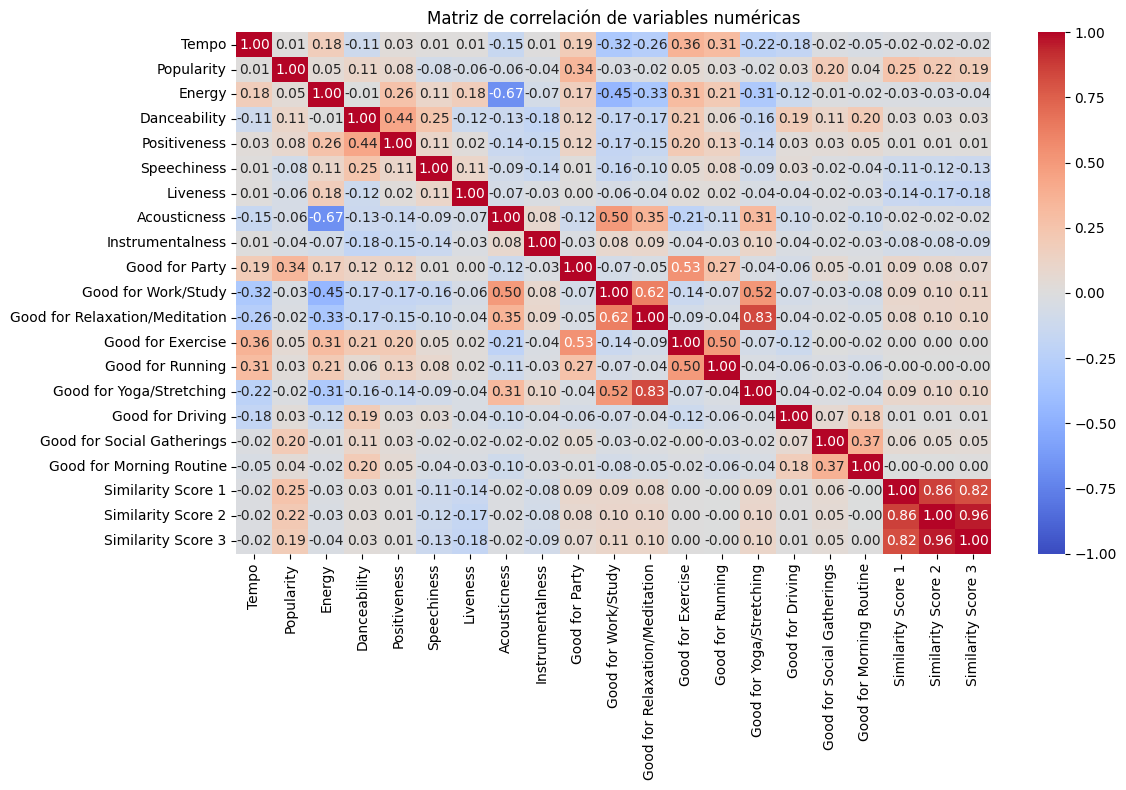

In [9]:
# Filtrar solo columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64'])

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
corr = num_cols.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.show()

In [10]:
# Valores unicos para columnas de tipo objeto
object_cols = df.select_dtypes(include=['object']).columns
print("\nCantidad de valores únicos por columna de tipo objeto:")
for col in object_cols:
    print(f"{col}: {df[col].nunique()}")


Cantidad de valores únicos por columna de tipo objeto:
Artist(s): 127334
song: 317906
text: 497496
Length: 1243
emotion: 13
Genre: 3097
Album: 154681
Release Date: 14299
Key: 24
Loudness (db): 3746
Time signature: 4
Explicit: 2
Similar Artist 1: 90280
Similar Song 1: 218726
Similar Artist 2: 87533
Similar Song 2: 207670
Similar Artist 3: 86963
Similar Song 3: 206000


En ésta sección se destaca principalmente el desbalance en la distribución de la clase objetivo (emotion), por lo que en la próxima iteración se eliminarán aquellos con escasa representación (True, love, pink, thrist, angry, confusion, interest) a fin de preservar la consistencia del análisis.  
Con respecto a los valores nulos, solo se hará un tratamiento especial en la columna Time Signature ya que se considera relevante para el proyecto, mientras que los registros faltantes en las demás variables serán descartados.  
Asimismo se observa que las variables numéricas son mayormente independientes entre sí, por lo que no comprometerá el modelado. Aún así, se eliminarán las columnas Similarity Score 1/2/3 ya que no brindan información relevante en éste proyecto.   
Continuando con el punto anterior, también se eliminarán las columnas Artist(s), song, Album, Release Date, Similarity Artist 1/2/3 y Similarity Song 1/2/3.  
También se transformará la columna Length a numérica y la columna Explicit a binaria (0-1) para obtener atributos que describan mejor el conjunto de datos, mientras que en la columna Loudness (db) se eliminarán los caracteres 'db' de cada registro para castearla a numérica.  
También se observa que la columna Genre es un campo multietiqueta ya que puede una misma cancion puede tener varios generos, por lo que se hará un tratamiento para desglosarlo.  
Luego, se convertirán las variables categoricas Time signature, Genre y Key a numéricas.  
Finalmente, para una mejor comprensión del conjunto de datos, se renombrará la columna Text por Lyrics y la columna Loudness (db) a Loudness.